<a href="https://colab.research.google.com/github/Panchol211/Week7_IP_-Housing-_-Prices/blob/main/Week7_IP__Housing_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting the housing prices in Boston Area 

# Resarch queston

# What is the goal of analysis ? 

The goal of this analysis is to develop a prediction model that can be used to accurately predict the sale price of houses given various predictor variables. The model will be developed after studying several factors that affect housing prices in the real estate industry.

# Defining the Metric for Success



This analysis will be considered a success when we are able to apply various regressions to the dataset in order to identify the best prediction model that has the highest accuracy level. The baseline model should be identified and compared to other regression models. The prediction model should not have overfitting or underfitting



# Understanding the Context





A company such as Hass Consulting, needs to be able to sell real estate properties at a price that is both profitable to the company as well as fair price for the buyers for the business to go on.


The following factors affect the price of any real estate property.These include the square footage, number of rooms, location, year of construction and the nature of views and amenities available in the locale. This analysis seeks to study some of the mentioned variables and train a regression model that can the be used to predict the price of a house. The models tested in this analysis include multiple linear regression, quantile regression, ridge regression, lasso regression and elastic net regression

# Experimental Design process


Below are the steps that will be conducted in this analysis in order to respond to the research question comprehensively







Load data and preview preliminary characteristics

Data Cleaning (check for and deal with outliers,

anomalies and missing data)

Exploratory Analysis

Implementing the Solution

Solution and findings 






In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy as sp

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
from sklearn.model_selection import LeaveOneOut
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# Loading and reading the Dataset 

In [58]:
# loading the dataset
housing_price = pd.read_csv("house_data.csv")
housing_price.head()

id     price  bedrooms  ...     long  sqft_living15  sqft_lot15
0  7129300520  221900.0         3  ... -122.257           1340        5650
1  6414100192  538000.0         3  ... -122.319           1690        7639
2  5631500400  180000.0         2  ... -122.233           2720        8062
3  2487200875  604000.0         4  ... -122.393           1360        5000
4  1954400510  510000.0         3  ... -122.045           1800        7503

[5 rows x 20 columns]

In [59]:
# checking the total number of records and columns

housing_price.shape

(21613, 20)

In [60]:
# checking datatypes of each attribute and previewing the existense of null values

housing_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

All the columns are numerics datatype

# Cleaning dataset for analysis 

In [61]:
# checking for null values in the dataset 
housing_price.columns.isnull()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False])

We checking based on the column because if we do it without specifying the column it will print out the all dataset with false or true on all the columns and rows.

In [62]:
# check for duplicate records

housing_price.duplicated().any()

True

We can see there is duplicate in the dataset, the main concern when it come to duplicate is the IDs

In [63]:
housing_price['id'].duplicated().any()

True

In [64]:
housing_price['zipcode'].duplicated().any()

True

The listed houses can have same zipcode if the property is on the same plot for example the high rise building, we shall only delete the dulicated IDs 

In [65]:
# display duplicate records

ids = housing_price["id"]
dups = housing_price[ids.isin(ids[ids.duplicated()])]
dups

id      price  bedrooms  ...     long  sqft_living15  sqft_lot15
93     6021501535   430000.0         3  ... -122.386           1570        4500
94     6021501535   700000.0         3  ... -122.386           1570        4500
313    4139480200  1380000.0         4  ... -122.102           3860       11244
314    4139480200  1400000.0         4  ... -122.102           3860       11244
324    7520000520   232000.0         2  ... -122.352           1820        7460
...           ...        ...       ...  ...      ...            ...         ...
20670  8564860270   502000.0         4  ... -121.734           2680        5992
20779  6300000226   240000.0         4  ... -122.342           1130        1598
20780  6300000226   380000.0         4  ... -122.342           1130        1598
21580  7853420110   594866.0         3  ... -121.886           2850        6000
21581  7853420110   625000.0         3  ... -121.886           2850        6000

[353 rows x 20 columns]

353 duplicated IDS on the dataset that needs to be deleted 

In [66]:
# drop duplicate rows

housing_price = housing_price.drop(dups.index, axis=0) 


In [67]:
# confirm that 353 records have been removed

housing_price.shape

(21260, 20)

In [68]:
# confirm that there are no more duplicates

housing_price.duplicated().any()

False

# Checking for outliers in the dataset 

In [78]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(housing_price))
print(z)

[[0.88585322 0.87007076 0.40105433 ... 0.30859971 0.94760722 0.26063263]
 [0.6372259  0.0113644  0.40105433 ... 0.74844061 0.4374061  0.18816434]
 [0.3651683  0.98389485 1.47830198 ... 0.13833872 1.06404291 0.17275253]
 ...
 [1.06297816 0.38054294 1.47830198 ... 0.60655645 1.41407681 0.39336365]
 [1.4912587  0.38625044 0.40105433 ... 1.02511138 0.84556699 0.41959651]
 [1.06297815 0.58999285 1.47830198 ... 0.60655645 1.41407681 0.41704609]]


In [82]:
threshold = 3

print(np.where(z > 3))

(array([    1,     5,     5, ..., 21237, 21237, 21247]), array([14,  3,  4, ..., 12, 18, 11]))


In [83]:
print(z[55][1])

0.9312838222883199


55 is not outlier , any feature that has a z-score of > 3 is an outlier 

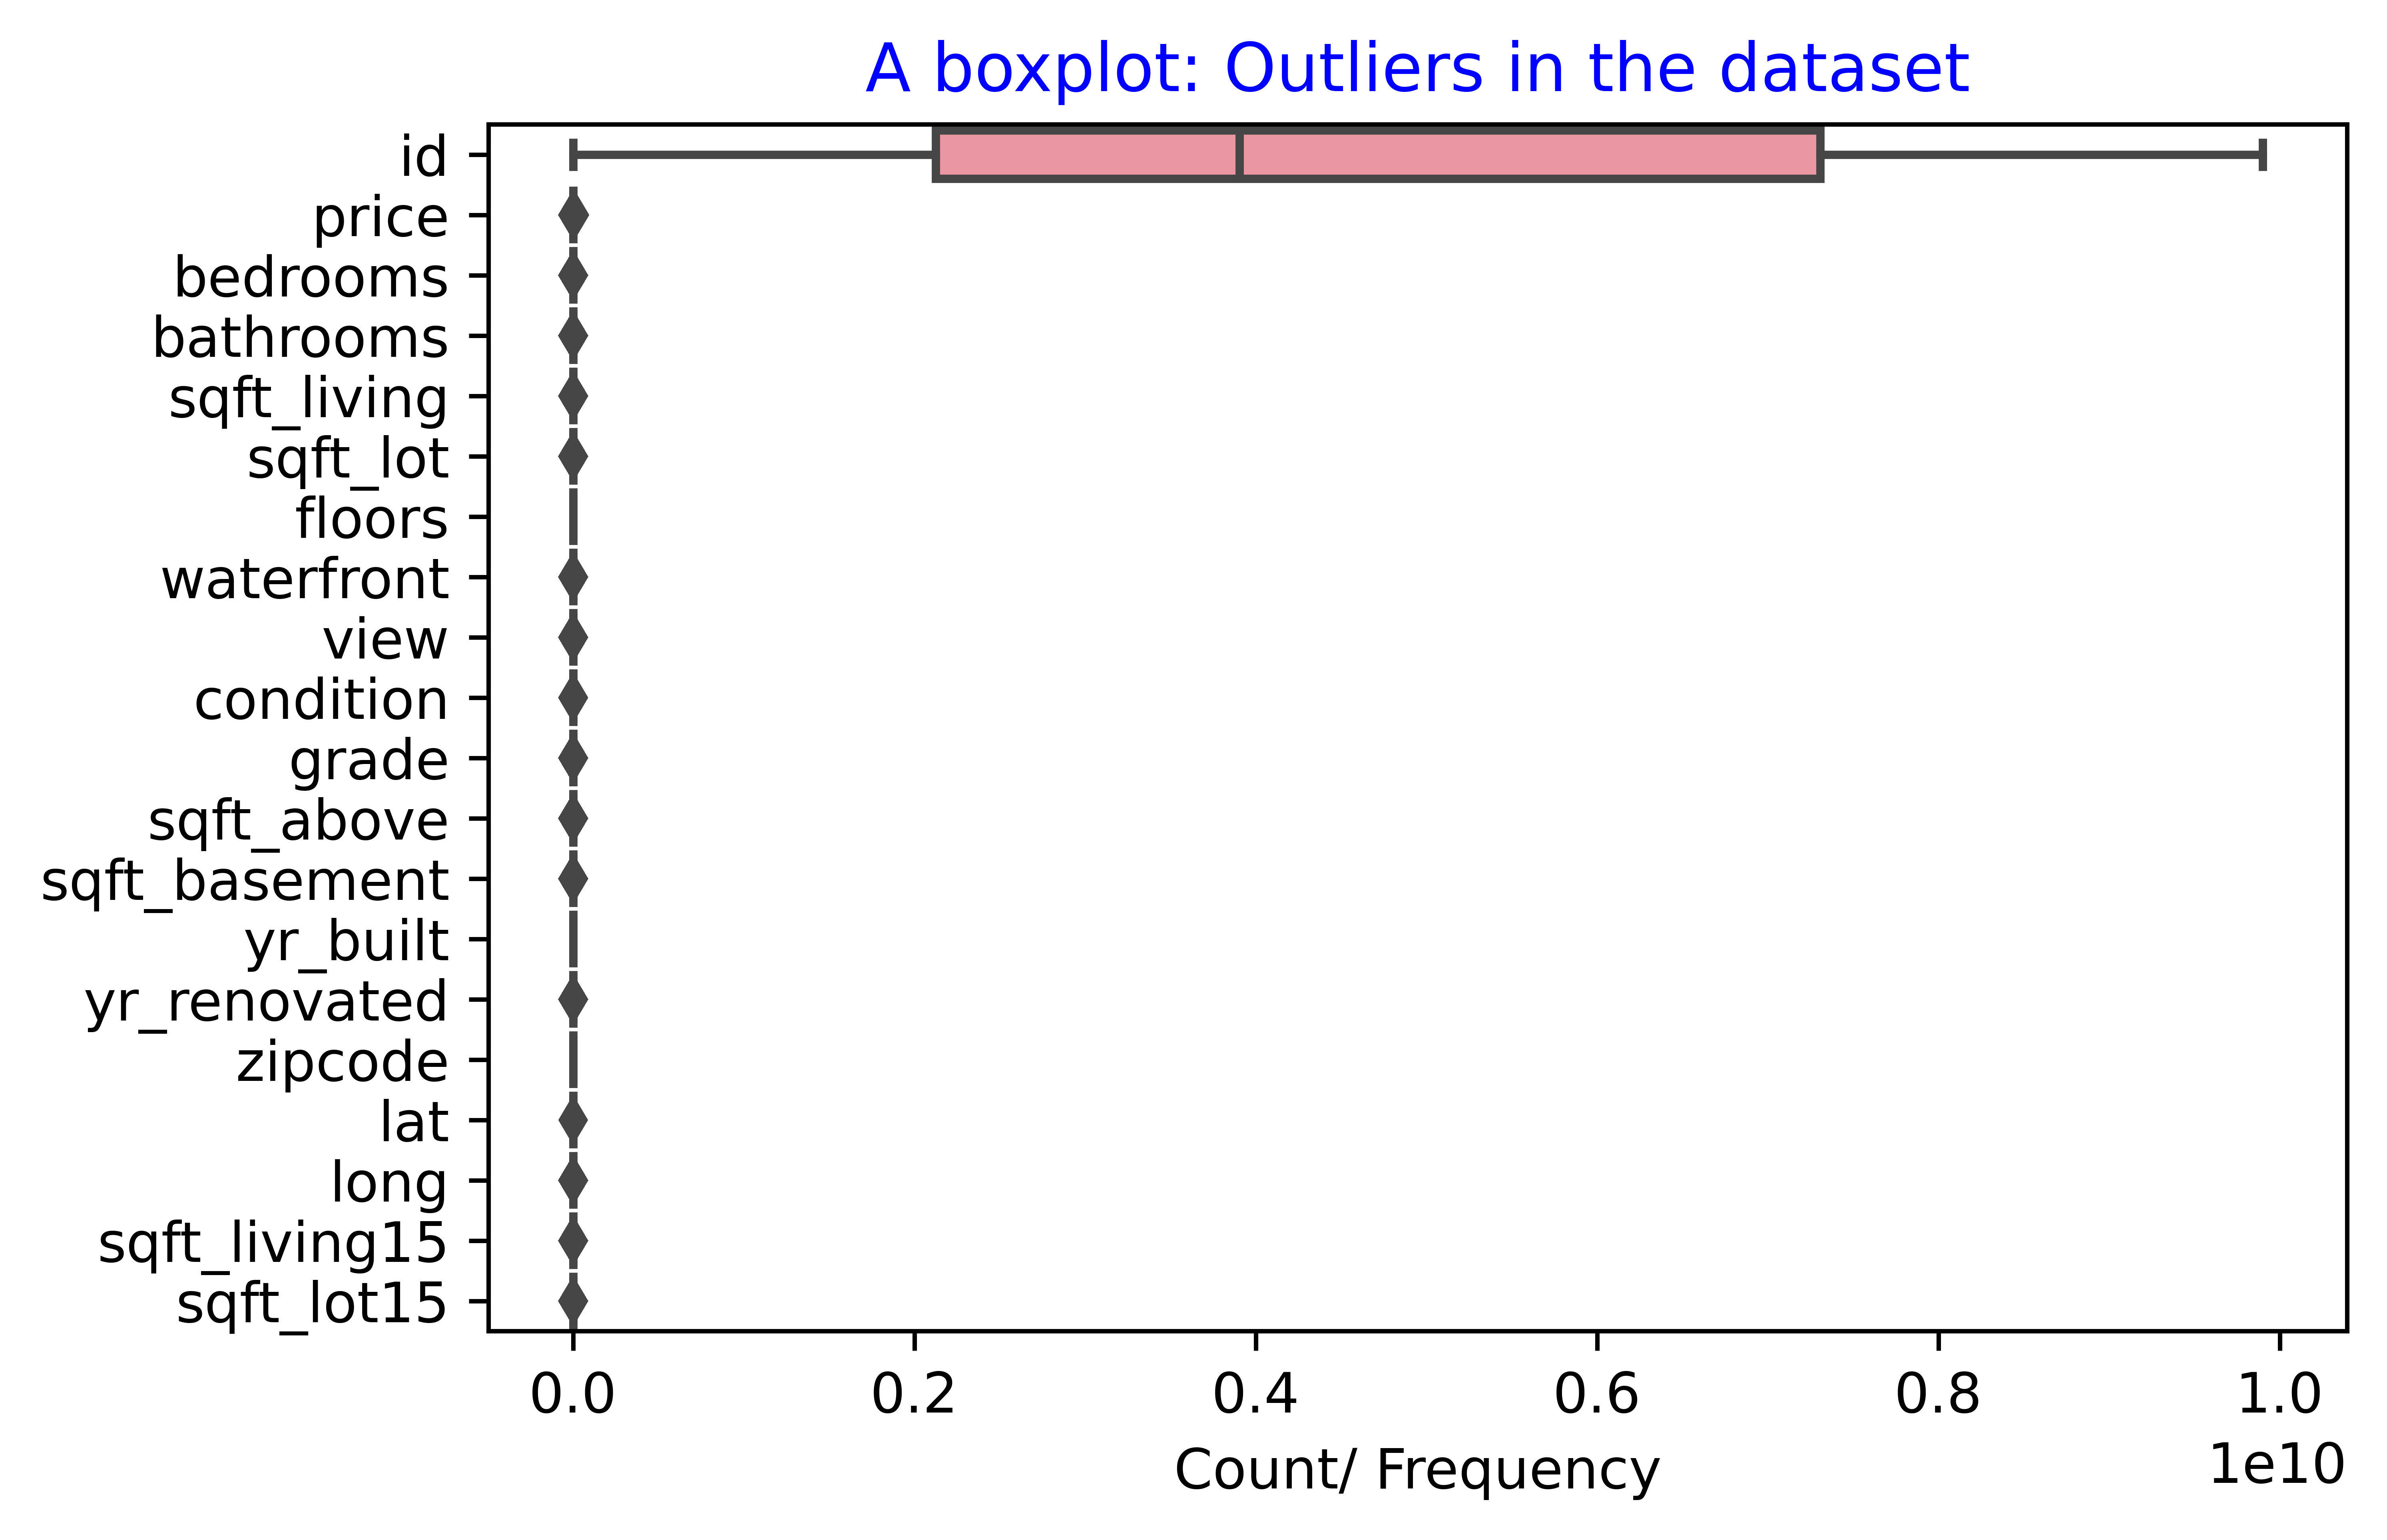

In [97]:
# check for outliers for the
col = housing_price[['id','price','bedrooms',	'bathrooms',	'sqft_living',	'sqft_lot',	'floors',	'waterfront', 'view',	'condition',	'grade','sqft_above',	'sqft_basement',	'yr_built',	'yr_renovated',	'zipcode',	'lat',	'long',	'sqft_living15','sqft_lot15']]
# check for outliers
plt.figure(dpi = 1000)
ax = sns.boxplot(data = col, orient="h")
plt.title('A boxplot: Outliers in the dataset', color = 'blue')
plt.xlabel('Count/ Frequency')
plt.show()

We can see that the id has a lot of outliers but the id is this datase t is not important 

In [14]:
# checking for missing values

housing_price.isnull().sum()

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

There are no missing values in the data 

# Exploratory Data Analysis


# Univariate Analysi

In [15]:
# Frequency table for waterfront existence

housing_price.waterfront.value_counts()

0    21097
1      163
Name: waterfront, dtype: int64

In [16]:
# Frequency table for condition

housing_price.condition.value_counts()

3    13791
4     5611
5     1673
2      157
1       28
Name: condition, dtype: int64

In [17]:
# Frequency table for grade

housing_price.grade.value_counts()

7     8811
8     6020
9     2597
6     1952
10    1126
11     393
5      227
12      88
4       29
13      13
3        3
1        1
Name: grade, dtype: int64

In [18]:
# Frequency table for number of bedrooms

print(housing_price.bedrooms.value_counts())

3     9639
4     6816
2     2712
5     1571
6      258
1      189
7       38
8       13
0       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64


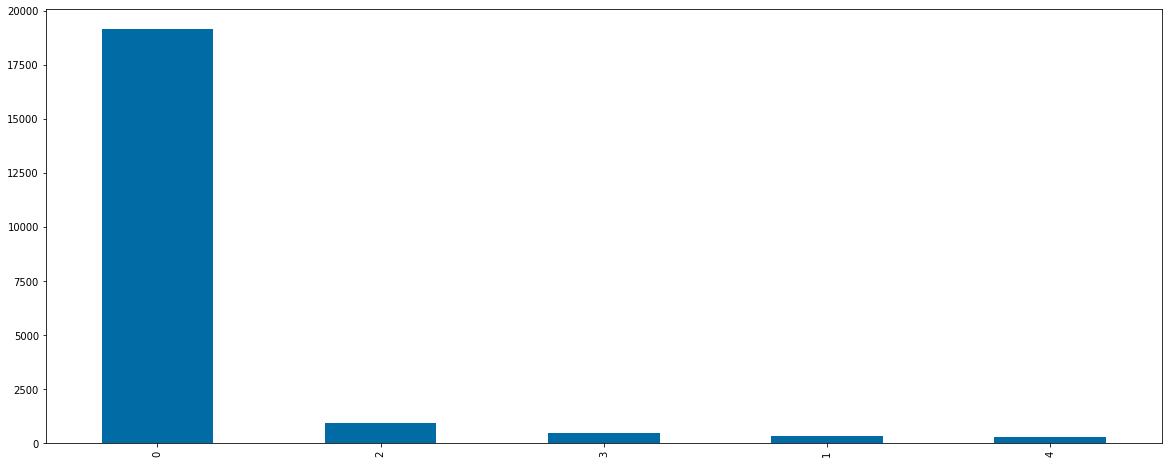

In [77]:
# Distribution of number of views

housing_price['view'].value_counts().plot.bar(figsize=(20,8))
plt.show()

We want to see how many time the buys have come to view the property on sale, we can see that the zero view was the highest and the second view follows, this means that if the person view the property for the first time they are most likely to come back for the second and even the third visit.

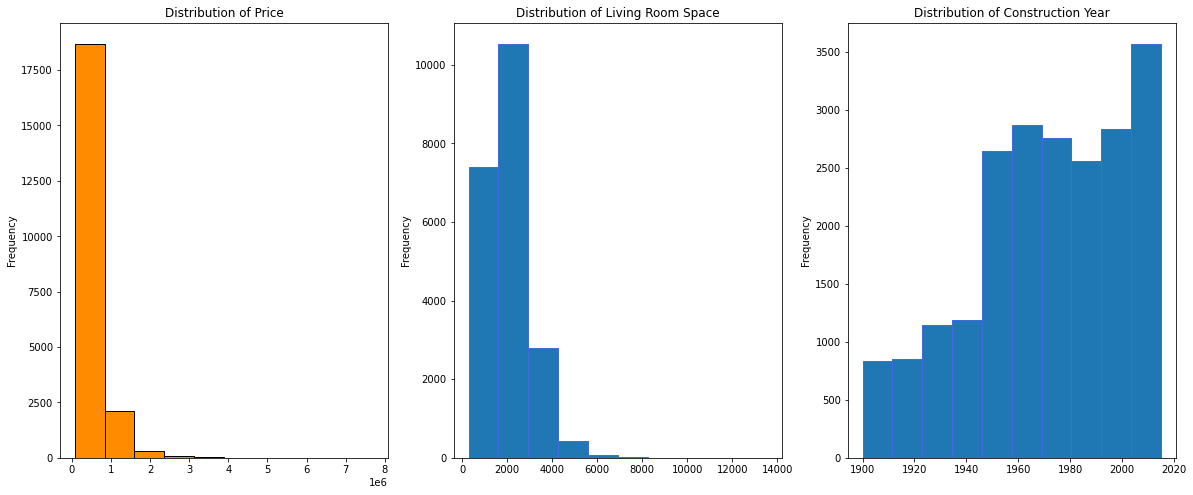

In [19]:
# histograms to show distribution of price, living room space and year of construction

fig, ax=plt.subplots(1,3, figsize=(20,8))
housing_price['price'].plot.hist(ax=ax[0], bins=10, edgecolor='black', color='darkorange')
ax[0].set_title('Distribution of Price')
housing_price['sqft_living'].plot.hist(ax=ax[1], bins=10, edgecolor='royalblue')
ax[1].set_title('Distribution of Living Room Space')
housing_price['yr_built'].plot.hist(ax=ax[2], bins=10, edgecolor='royalblue')
ax[2].set_title('Distribution of Construction Year')

plt.show()

We want to vitualzied  if living space, price and the year the property was build played a major role in buyers' decession making .

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

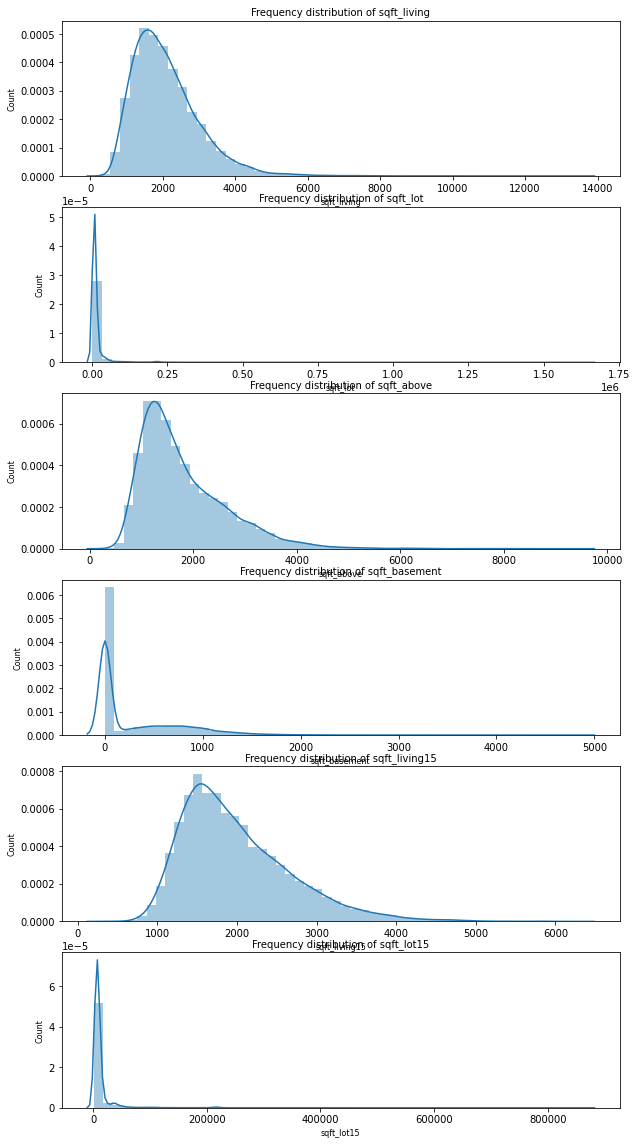

In [20]:
# Frequency distribution plots

col_names = ['sqft_living','sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15']
fig, ax = plt.subplots(len(col_names), figsize=(10,20))

for i, col_val in enumerate(col_names):

    sns.distplot(housing_price[col_val], hist=True, ax=ax[i])
    ax[i].set_title('Frequency distribution of '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    ax[i].set_ylabel('Count', fontsize=8)

plt.show()

# Measures of Central Tendencies



In [21]:
# mean, mode and median of prices

print('Mean price is ' + str(housing_price.price.mean()))
print('Median price is ' + str(housing_price.price.median()))
print('Mode price is ' + str(housing_price.price.mode()))

Mean price is 542183.3717309502
Median price is 451000.0
Mode price is 0    450000.0
dtype: float64


In [22]:
# mean, mode and median of bedrooms

print('Mean number of bedrooms is ' + str(housing_price.bedrooms.mean()))
print('Median number of bedrooms is ' + str(housing_price.bedrooms.median()))
print('Mode number of bedrooms is ' + str(housing_price.bedrooms.mode()))

Mean number of bedrooms is 3.3722953904045156
Median number of bedrooms is 3.0
Mode number of bedrooms is 0    3
dtype: int64


In [23]:
# mean, mode and median of bathrooms

print('Mean number of bathrooms is ' + str(housing_price.bathrooms.mean()))
print('Median number of bathrooms is ' + str(housing_price.bathrooms.median()))
print('Mode number of bathrooms is ' + str(housing_price.bathrooms.mode()))

Mean number of bathrooms is 2.119931796801505
Median number of bathrooms is 2.25
Mode number of bathrooms is 0    2.5
dtype: float64


In [24]:
# summary of standard deviation, range, and interquatile range

housing_price.describe()

id         price  ...  sqft_living15     sqft_lot15
count  2.126000e+04  2.126000e+04  ...   21260.000000   21260.000000
mean   4.581059e+09  5.421834e+05  ...    1990.062324   12803.450141
std    2.876664e+09  3.681205e+05  ...     686.020116   27447.132427
min    1.200019e+06  7.500000e+04  ...     399.000000     651.000000
25%    2.124064e+09  3.249500e+05  ...    1490.000000    5100.000000
50%    3.904921e+09  4.510000e+05  ...    1840.000000    7620.000000
75%    7.308600e+09  6.468500e+05  ...    2370.000000   10090.250000
max    9.900000e+09  7.700000e+06  ...    6210.000000  871200.000000

[8 rows x 20 columns]

# Bivariate Analysis

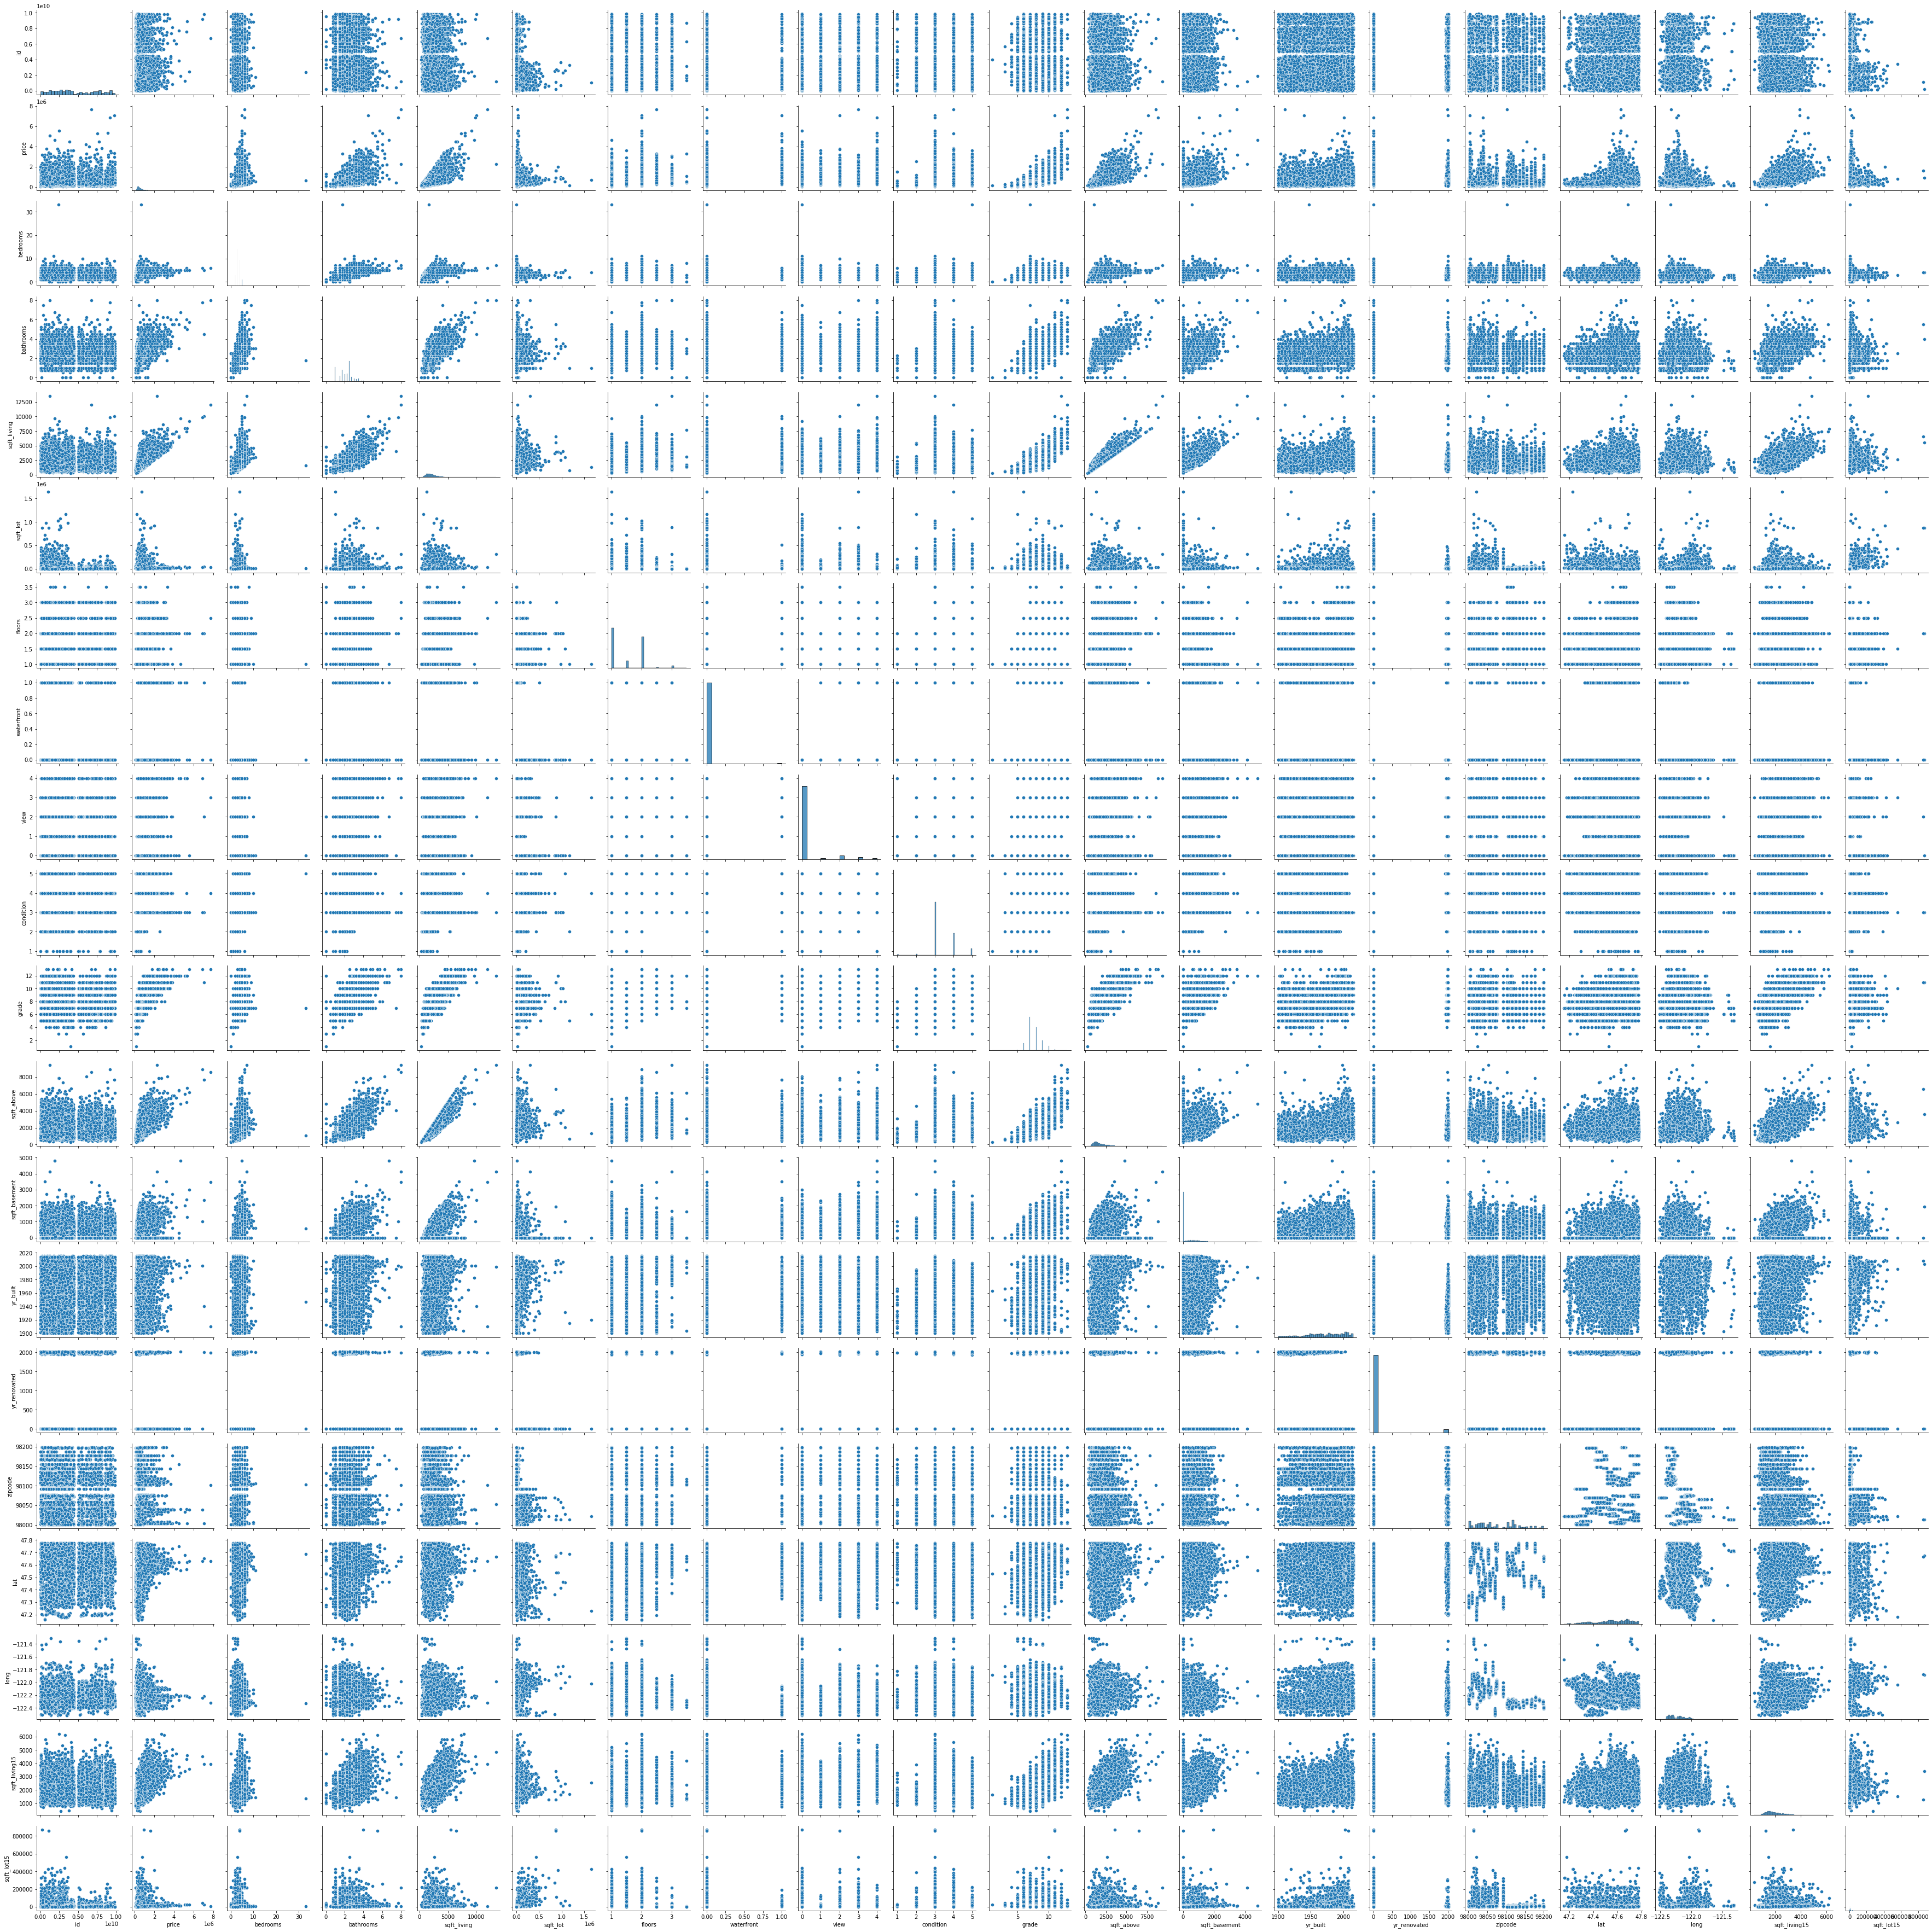

In [27]:
# Ploting the bivariate summaries and recording observations

sns.pairplot(housing_price)
plt.show()

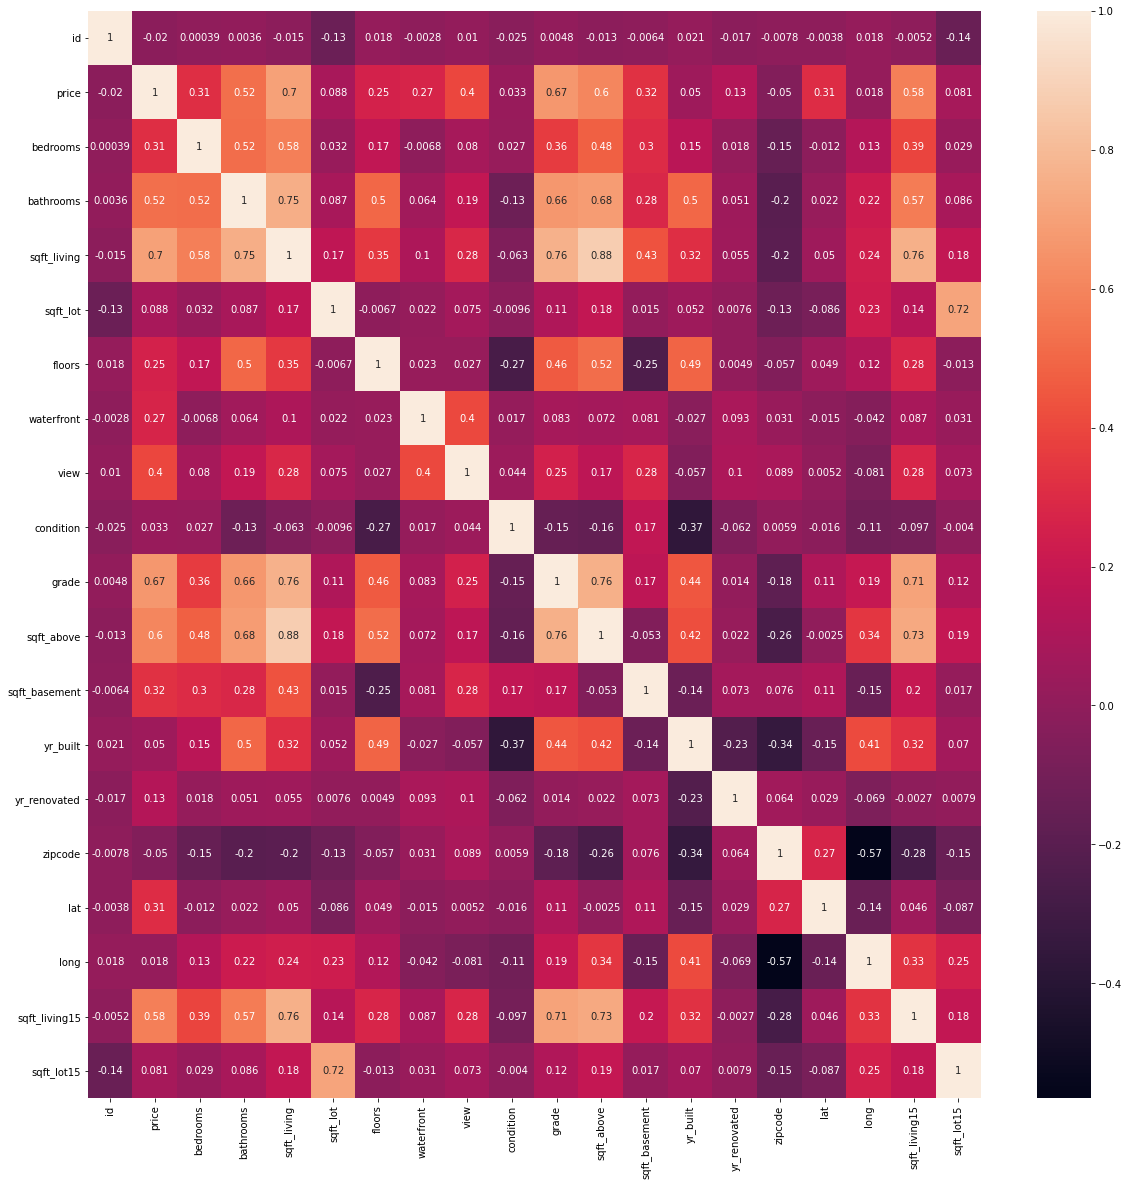

In [25]:
# Plotting the Pearson correlation coefficient among variables
plt.figure(figsize=(20, 20))
sns.heatmap(housing_price.corr(),annot=True)
plt.show()

# Multivariate Analysis





Principle Component Analysis (PCA)

In [26]:
# defining the features and target variable

x = housing_price.drop(['price','id'],1)
y = housing_price['price']

# splitting the data into training and test sets

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# normalize feature set

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# applying PCA

pca = PCA()
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

# checking the variance explained by each principal component

explained_variance = pca.explained_variance_ratio_
explained_variance

array([2.91424030e-01, 1.22285973e-01, 1.02253866e-01, 7.56135086e-02,
       6.75335411e-02, 5.60296879e-02, 4.85221131e-02, 4.67420302e-02,
       3.60906107e-02, 3.29349843e-02, 2.75106195e-02, 2.24415031e-02,
       1.79247981e-02, 1.56577539e-02, 1.40507949e-02, 1.25281628e-02,
       1.04560220e-02, 7.99875601e-34])

The results above show that the first three components explain 29% , 12% and 10% (respectively) of the variance in the dataset

In [27]:
# using PCA to train algorithm

pca = PCA(n_components=1)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

# making predictions using random forest classifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(x_train, y_train)

# Predicting the Test set results

y_pred = classifier.predict(x_test)

# evaluating the model with only one principal component
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Accuracy 0.007525870178739417


Using one feature the random forest perform extremely poor , at the percentage accuracy of 7% 

# Feature Engineering

In [28]:
# dropping the id column

housing_price= housing_price.drop(columns='id')

In [29]:
# create a new column showing the age of the house

age = [housing_price['yr_renovated'] == 0,
              housing_price['yr_renovated'] != 0]

# create a list of the values to assign each condition
age1 = 2021 - housing_price['yr_built']
age2 = 2021 - housing_price['yr_renovated']

values = [age1, age2]

# creating a new columnn status column using the conditions and values above

housing_price['age'] = np.select(age, values)
housing_price

price  bedrooms  bathrooms  ...  sqft_living15  sqft_lot15  age
0      221900.0         3       1.00  ...           1340        5650   66
1      538000.0         3       2.25  ...           1690        7639   30
2      180000.0         2       1.00  ...           2720        8062   88
3      604000.0         4       3.00  ...           1360        5000   56
4      510000.0         3       2.00  ...           1800        7503   34
...         ...       ...        ...  ...            ...         ...  ...
21608  360000.0         3       2.50  ...           1530        1509   12
21609  400000.0         4       2.50  ...           1830        7200    7
21610  402101.0         2       0.75  ...           1020        2007   12
21611  400000.0         3       2.50  ...           1410        1287   17
21612  325000.0         2       0.75  ...           1020        1357   13

[21260 rows x 20 columns]

We making an assumption that the renovated house  is as good as the new house

In [30]:
# dropping the construction and renovation year

housing_price = housing_price. drop(columns=['yr_built', 'yr_renovated'])

In [31]:
# encoding the zipcode variable

# import labelencoder
from sklearn.preprocessing import LabelEncoder

# apply label encoder to appropriate column

le = LabelEncoder()
housing_price['zipcode'] = le.fit_transform(housing_price['zipcode'])

housing_price.head()

price  bedrooms  bathrooms  ...  sqft_living15  sqft_lot15  age
0  221900.0         3       1.00  ...           1340        5650   66
1  538000.0         3       2.25  ...           1690        7639   30
2  180000.0         2       1.00  ...           2720        8062   88
3  604000.0         4       3.00  ...           1360        5000   56
4  510000.0         3       2.00  ...           1800        7503   34

[5 rows x 18 columns]

In [32]:
# dropping the latitude and longitude

housing_price = housing_price.drop(columns=['lat', 'long'])
housing_price.head()

price  bedrooms  bathrooms  ...  sqft_living15  sqft_lot15  age
0  221900.0         3       1.00  ...           1340        5650   66
1  538000.0         3       2.25  ...           1690        7639   30
2  180000.0         2       1.00  ...           2720        8062   88
3  604000.0         4       3.00  ...           1360        5000   56
4  510000.0         3       2.00  ...           1800        7503   34

[5 rows x 16 columns]

Latitude and longitude are not important because the location will be identify using zipcode 

In [33]:
# dropping sqft_above and sqft_basement since they add up to sqft_living

housing_price = housing_price.drop(columns=['sqft_above', 'sqft_basement'])
housing_price.head()

price  bedrooms  bathrooms  ...  sqft_living15  sqft_lot15  age
0  221900.0         3       1.00  ...           1340        5650   66
1  538000.0         3       2.25  ...           1690        7639   30
2  180000.0         2       1.00  ...           2720        8062   88
3  604000.0         4       3.00  ...           1360        5000   56
4  510000.0         3       2.00  ...           1800        7503   34

[5 rows x 14 columns]

# Checking for multicollinearity

In [34]:
# Remove the dependent column so as to focus on independent variables only.

ind_variable = housing_price.drop(columns=['price'])

# Display the correlations between the independent variables

correlations = ind_variable.corr()

correlations

bedrooms  bathrooms  ...  sqft_lot15       age
bedrooms       1.000000   0.517678  ...    0.028991 -0.164476
bathrooms      0.517678   1.000000  ...    0.086081 -0.535805
sqft_living    0.578373   0.754187  ...    0.182266 -0.340672
sqft_lot       0.031738   0.086547  ...    0.717635 -0.051580
floors         0.174991   0.499077  ...   -0.012566 -0.504637
waterfront    -0.006787   0.063725  ...    0.030686  0.001179
view           0.079556   0.185623  ...    0.073164  0.021844
condition      0.027345  -0.130592  ...   -0.004037  0.404295
grade          0.359853   0.664500  ...    0.117375 -0.457554
zipcode       -0.153929  -0.190917  ...   -0.144523  0.298769
sqft_living15  0.394718   0.567780  ...    0.181688 -0.321117
sqft_lot15     0.028991   0.086081  ...    1.000000 -0.068876
age           -0.164476  -0.535805  ...   -0.068876  1.000000

[13 rows x 13 columns]

# Multiple Linear Regression



This prediction model will be the baseline model for the research question and I shall compare its prediction accuracy and performance with other regression models.

In [35]:
# Defining the features and target variable
X = housing_price[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 
        'zipcode', 'sqft_living15', 'sqft_lot15', 'age']]
y = housing_price['price']

# Dividing the data into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Training the Algorithm

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [36]:
# Checking coefficients chosen by the regression model 

coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

Coefficient
bedrooms       -38452.402893
bathrooms       45882.152002
sqft_living       166.712185
sqft_lot           -0.004068
floors          14200.072011
waterfront     598383.314670
view            48116.501026
condition       20817.595906
grade          118360.657775
zipcode           388.932799
sqft_living15      18.771138
sqft_lot15         -0.578656
age              3146.833249

In [37]:
# Making Predictions

y_pred = regressor.predict(X_test)

# Comparing actual output values for X_test with the predicted values

pre = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
pre

Actual      Predicted
12987   324950.0  261548.802729
6863    461000.0  343103.668843
19684  2210000.0  945854.185645
6185    287000.0  418335.707997
2889    635000.0  591719.204598
...          ...            ...
14016   255000.0  280266.137139
13306   395000.0  377661.346072
1360    815000.0  964819.197015
16730   209950.0  255400.626600
19778   445000.0  412420.985752

[4252 rows x 2 columns]

In [38]:
# Evaluating the Model

print('Mean Price: ', housing_price.price.mean())
print("Linear Regression R2 score is ",metrics.r2_score(y_test, y_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Price:  542183.3717309502
Linear Regression R2 score is  0.6255774238505589
Mean Absolute Error: 139795.1935568068
Mean Squared Error: 49349324123.15413
Root Mean Squared Error: 222147.07768312894


The RMSE score is much greater than 10% of the mean value of the prices which could imply that our algorithm is not very accurate. The R2 score of the model is 62.56% which is relatively low. However, we need to check the residuals to confirm this further.

# Residuals and Heteroskedasticity Testing

In [39]:
# Create the residuals

residuals = np.subtract(y_pred, y_test)

# Describe the residuals

pd.DataFrame(residuals).describe()

price
count  4.252000e+03
mean  -5.491715e+02
std    2.221725e+05
min   -4.542832e+06
25%   -8.791063e+04
50%    1.558032e+04
75%    1.130613e+05
max    9.009142e+05

The mean of the residuals is close to 0, indicating that the model tends to be fairly correct, although slightly under estimating prices by, on average, 5.49%

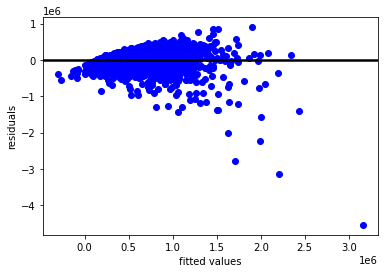

In [40]:
# plotting the residuals

plt.scatter(y_pred, residuals, color='blue')
plt.ylabel('residuals')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='black', linewidth=2.5)
plt.show()

In [41]:
# Heteroskedasticity test using bartlett's test

test_result, p_value = sp.stats.bartlett(y_pred, residuals)

# Computing a critical value of the chi squared distribution

degree_of_freedom = len(y_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print('Critical Value:', critical_value)
print('Test Statistic:', test_result)

if (test_result > critical_value):
  print('The variances are unequal, and the model should be reassessed')
else:
  print('The variances are homogeneous!')

Critical Value: inf
Test Statistic: 282.3279366138705
The variances are homogeneous!


An infinite critical value in the context of a heteroskedasticity test means that there might be multiple cut off points and many critical values. However, this is not problematic for the analysis since the variances are homogeneous

# Quantile Regression




we shall use quantile regression to get a more comprehensive picture of the effect of the independent variables on the dependent variable

In [42]:
import statsmodels.formula.api as smf

# Defining the quantiles

quantiles = [0.25,0.5,0.75]

# Finding the regression coefficients for the quantiles

for i in quantiles:
  mod = smf.quantreg('y ~ X', housing_price)
  res = mod.fit(i)
  
  # Summary of the model
  print(res.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:               0.3150
Model:                       QuantReg   Bandwidth:                   2.147e+04
Method:                 Least Squares   Sparsity:                    3.716e+05
Date:                Fri, 30 Jul 2021   No. Observations:                21260
Time:                        04:22:44   Df Residuals:                    21246
                                        Df Model:                           13
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -7.895e+05   1.21e+04    -65.208      0.000   -8.13e+05   -7.66e+05
X[0]       -2.238e+04   1468.047    -15.244      0.000   -2.53e+04   -1.95e+04
X[1]        2.977e+04   2553.483     11.660      0.000    2.48e+04    3.48e+04
X[2]          73.8915      2.607     28.339      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:               0.3848
Model:                       QuantReg   Bandwidth:                   2.445e+04
Method:                 Least Squares   Sparsity:                    3.512e+05
Date:                Fri, 30 Jul 2021   No. Observations:                21260
Time:                        04:22:48   Df Residuals:                    21246
                                        Df Model:                           13
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -7.998e+05   1.44e+04    -55.682      0.000   -8.28e+05   -7.72e+05
X[0]       -2.962e+04   1668.856    -17.751      0.000   -3.29e+04   -2.64e+04
X[1]        3.303e+04   2829.148     11.673      0.000    2.75e+04    3.86e+04
X[2]         111.0517      2.914     38.115      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


The quantile regression prediction is relatively poor. Pseudo R-squared values which is as low as 0.31 for the 25 percentile and as high as 0.45 for the 75 percentile.
The model explains less than 0.5 of the variability in the dataset. there could be mulitcollinearity. More exploration of other models is recomended.

In [43]:
# Checking other quantiles

quantiles = np.arange(0.1,1,0.1)

# Finding the regression coefficients for the quantiles

for i in quantiles:
  mod = smf.quantreg('y ~ X', housing_price)
  res = mod.fit(i)
  
  # Summary of the model
  print(res.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:               0.2596
Model:                       QuantReg   Bandwidth:                   2.283e+04
Method:                 Least Squares   Sparsity:                    4.953e+05
Date:                Fri, 30 Jul 2021   No. Observations:                21260
Time:                        04:24:30   Df Residuals:                    21246
                                        Df Model:                           13
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4.809e+05   1.06e+04    -45.154      0.000   -5.02e+05    -4.6e+05
X[0]        -1.62e+04   1365.147    -11.868      0.000   -1.89e+04   -1.35e+04
X[1]        2.495e+04   2304.004     10.827      0.000    2.04e+04    2.95e+04
X[2]          60.6185      2.391     25.353      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:               0.2965
Model:                       QuantReg   Bandwidth:                   2.137e+04
Method:                 Least Squares   Sparsity:                    3.870e+05
Date:                Fri, 30 Jul 2021   No. Observations:                21260
Time:                        04:24:34   Df Residuals:                    21246
                                        Df Model:                           13
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6.643e+05   1.14e+04    -58.207      0.000   -6.87e+05   -6.42e+05
X[0]       -2.271e+04   1408.083    -16.128      0.000   -2.55e+04      -2e+04
X[1]        2.592e+04   2440.408     10.620      0.000    2.11e+04    3.07e+04
X[2]          73.8493      2.500     29.538      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:               0.3310
Model:                       QuantReg   Bandwidth:                   2.219e+04
Method:                 Least Squares   Sparsity:                    3.523e+05
Date:                Fri, 30 Jul 2021   No. Observations:                21260
Time:                        04:24:38   Df Residuals:                    21246
                                        Df Model:                           13
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      -8e+05   1.24e+04    -64.562      0.000   -8.24e+05   -7.76e+05
X[0]       -2.363e+04   1481.288    -15.954      0.000   -2.65e+04   -2.07e+04
X[1]        3.039e+04   2575.705     11.797      0.000    2.53e+04    3.54e+04
X[2]          80.5993      2.617     30.795      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:               0.3590
Model:                       QuantReg   Bandwidth:                   2.367e+04
Method:                 Least Squares   Sparsity:                    3.458e+05
Date:                Fri, 30 Jul 2021   No. Observations:                21260
Time:                        04:24:42   Df Residuals:                    21246
                                        Df Model:                           13
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -8.412e+05   1.35e+04    -62.526      0.000   -8.68e+05   -8.15e+05
X[0]       -2.611e+04   1572.064    -16.608      0.000   -2.92e+04    -2.3e+04
X[1]        3.245e+04   2719.471     11.931      0.000    2.71e+04    3.78e+04
X[2]          93.1748      2.778     33.541      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:               0.3848
Model:                       QuantReg   Bandwidth:                   2.445e+04
Method:                 Least Squares   Sparsity:                    3.512e+05
Date:                Fri, 30 Jul 2021   No. Observations:                21260
Time:                        04:24:46   Df Residuals:                    21246
                                        Df Model:                           13
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -7.998e+05   1.44e+04    -55.682      0.000   -8.28e+05   -7.72e+05
X[0]       -2.962e+04   1668.856    -17.751      0.000   -3.29e+04   -2.64e+04
X[1]        3.303e+04   2829.148     11.673      0.000    2.75e+04    3.86e+04
X[2]         111.0517      2.914     38.115      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:               0.4099
Model:                       QuantReg   Bandwidth:                   2.406e+04
Method:                 Least Squares   Sparsity:                    3.607e+05
Date:                Fri, 30 Jul 2021   No. Observations:                21260
Time:                        04:24:50   Df Residuals:                    21246
                                        Df Model:                           13
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -8.54e+05   1.49e+04    -57.315      0.000   -8.83e+05   -8.25e+05
X[0]       -2.804e+04   1737.110    -16.143      0.000   -3.14e+04   -2.46e+04
X[1]        3.234e+04   2864.946     11.290      0.000    2.67e+04     3.8e+04
X[2]         117.8488      2.998     39.307      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:               0.4327
Model:                       QuantReg   Bandwidth:                   2.281e+04
Method:                 Least Squares   Sparsity:                    4.234e+05
Date:                Fri, 30 Jul 2021   No. Observations:                21260
Time:                        04:24:54   Df Residuals:                    21246
                                        Df Model:                           13
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -8.775e+05   1.71e+04    -51.192      0.000   -9.11e+05   -8.44e+05
X[0]       -2.759e+04   2010.918    -13.720      0.000   -3.15e+04   -2.36e+04
X[1]        3.214e+04   3191.651     10.071      0.000    2.59e+04    3.84e+04
X[2]         130.2313      3.413     38.157      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:               0.4497
Model:                       QuantReg   Bandwidth:                   2.296e+04
Method:                 Least Squares   Sparsity:                    5.705e+05
Date:                Fri, 30 Jul 2021   No. Observations:                21260
Time:                        04:24:58   Df Residuals:                    21246
                                        Df Model:                           13
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -8.636e+05   2.15e+04    -40.159      0.000   -9.06e+05   -8.21e+05
X[0]       -3.466e+04   2564.637    -13.515      0.000   -3.97e+04   -2.96e+04
X[1]         2.99e+04   3893.097      7.680      0.000    2.23e+04    3.75e+04
X[2]         169.4718      4.238     39.985      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


There is small improvement when we increase the quantile range to the extreme ends that is 10% on end end.

# Ridge Regression




Implementing L2 regularization method to help deal with multicollinearity in the data

In [44]:
# create ridge model and indicate normalization 
 
ridge = Ridge(normalize=True)

# setup the grid to use

search = GridSearchCV(estimator=ridge,param_grid={'alpha':np.logspace(-5,2,8)},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

# run the model and determine the model's strength  

search.fit(X_train,y_train)
print(search.best_params_)

print(abs(search.best_score_))

{'alpha': 0.001}
49142387170.492455


The MSE of the ridge is better than that of the baseline model above.

In [45]:
# fit the model with the alpha value above and find the metrics 

ridge = Ridge(normalize=True,alpha=0.001)
ridge.fit(X_train,y_train)
y_pred_ridge=ridge.predict(X_test)

print("Mean Absolute Error:", metrics.mean_absolute_error(y_test,y_pred_ridge))
print("Ridge Regression R2 score is ",metrics.r2_score(y_test, y_pred_ridge))
print("Mean Squared Error:", metrics.mean_squared_error(y_test,y_pred_ridge))
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_test, y_pred_ridge)))

Mean Absolute Error: 139753.22251829924
Ridge Regression R2 score is  0.6255601781622233
Mean Squared Error: 49351597124.617226
Root Mean Squared Error: 222152.1936074844


In [46]:
# Checking the coefficient values

coef_dict_baseline = {}
for coef, feat in zip(ridge.coef_,X.columns):
    coef_dict_baseline[feat] = coef

# comparing with the coefficients from the baseline model
print('    Linear Coefficients')
print(coeff_df)
print('>>>>>>>>>>>>>>>>>>')
print('    Ridge Coefficients')
coef_dict_baseline

    Linear Coefficients
                 Coefficient
bedrooms       -38452.402893
bathrooms       45882.152002
sqft_living       166.712185
sqft_lot           -0.004068
floors          14200.072011
waterfront     598383.314670
view            48116.501026
condition       20817.595906
grade          118360.657775
zipcode           388.932799
sqft_living15      18.771138
sqft_lot15         -0.578656
age              3146.833249
>>>>>>>>>>>>>>>>>>
    Ridge Coefficients


{'age': 3139.7312482337047,
 'bathrooms': 45996.43454683844,
 'bedrooms': -38253.48423842986,
 'condition': 20887.164728185857,
 'floors': 14215.391562378361,
 'grade': 118171.27071219812,
 'sqft_living': 166.2010270829303,
 'sqft_living15': 19.22535215979663,
 'sqft_lot': -0.003820597873022918,
 'sqft_lot15': -0.5769444471144922,
 'view': 48178.852818797095,
 'waterfront': 597909.6807538297,
 'zipcode': 391.9759774094524}

After comparing the outcome of the two model , the improvement was very minimal.

# Lasso Regression





Implementing L1 regularization method to help deal with multicollinearity in the data.

In [47]:
# Testing the lasso model on the whole dataset

from sklearn.metrics import mean_squared_error

# Creating lasso object

lasso = linear_model.Lasso() 

# Fitting the models

lasso.fit(X, y) 

# Print scores, MSE, and coefficients
# 
print("lasso score:", lasso.score(X, y)) 
print("lasso MSE:", mean_squared_error(y, lasso.predict(X))) 
print("lasso coef:", lasso.coef_) 

lasso score: 0.6385930527876543
lasso MSE: 48972935559.10197
lasso coef: [-3.93856585e+04  4.35826762e+04  1.72692939e+02 -1.18584503e-02
  1.65081427e+04  5.94071814e+05  4.95095771e+04  2.00210328e+04
  1.15667292e+05  3.29075176e+02  1.51054121e+01 -5.63714090e-01
  3.09771272e+03]


In [48]:
# Splitting the data into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

# Choosing the regularization parameter  

parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}

linear = linear_model.LinearRegression()
lasso = linear_model.Lasso() 
gridlasso = GridSearchCV(lasso, parameters, scoring ='r2') 

# Fitting models and print the best parameters, R-squared scores, MSE, and coefficients

gridlasso.fit(X_train, y_train) 
linear.fit(X_train, y_train) 
print("lasso best parameters:", gridlasso.best_params_) 
print("lasso MSE:", mean_squared_error(y_test, gridlasso.predict(X_test)))
print("Lasso Regression R2 score is ",metrics.r2_score(y_test, gridlasso.predict(X_test)))
print("linear MSE:", mean_squared_error(y_test, linear.predict(X_test))) 
print("lasso best estimator coef:", gridlasso.best_estimator_.coef_)
print("linear coef:", linear.coef_)

lasso best parameters: {'alpha': 24.0}
lasso MSE: 51179027280.36488
Lasso Regression R2 score is  0.6382860948676701
linear MSE: 51172478879.007385
lasso best estimator coef: [-4.48522392e+04  4.00621025e+04  1.77787661e+02 -3.38649601e-02
  1.29380354e+04  5.58127196e+05  5.15834314e+04  1.98390756e+04
  1.14611341e+05  2.52971715e+02  1.56601127e+01 -6.50404333e-01
  3.04472367e+03]
linear coef: [-4.48911209e+04  4.01765598e+04  1.77699828e+02 -3.38110834e-02
  1.30211422e+04  5.61867482e+05  5.14561381e+04  1.99041096e+04
  1.14642662e+05  2.52589967e+02  1.56648248e+01 -6.50271421e-01
  3.04621673e+03]


The L1 regularization has improved the model t0 63.83%

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 385014593688390.6, tolerance: 212882068187.22168
  positive)


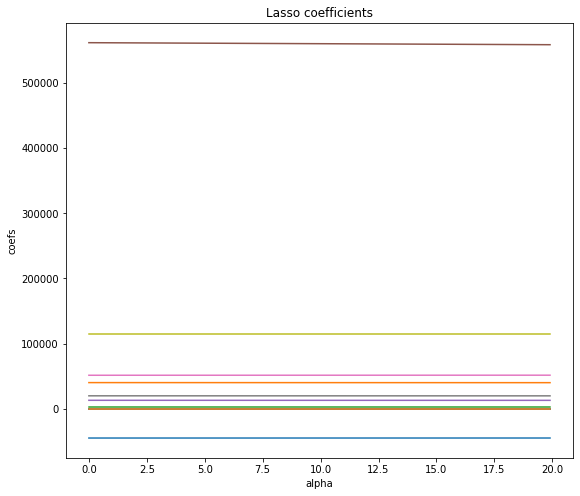

In [49]:
# Visualizing results

coefsLasso = [] 

alphasLasso = np.arange (0, 20, 0.1) 
for i in range(200):
    lasso = linear_model.Lasso(alpha=alphasLasso[i])
    lasso.fit(X_train, y_train)
    coefsLasso.append(lasso.coef_) 

# Building Lasso coefficient plots

plt.figure(figsize = (20,8))

plt.subplot(121)
plt.plot(alphasLasso, coefsLasso)
plt.title('Lasso coefficients')
plt.xlabel('alpha')
plt.ylabel('coefs')

plt.show()

Lasso regression influences less on the large coefficients, but reduces the small ones to zeroes. This allows us to determine which features are important to us and keeps the features that may influence the target variable.

# Elastic Net Regression



Combining L1 and L2 regularization methods

In [50]:
# We shall you use the features and target variable defined previously

from sklearn.linear_model import ElasticNet

# Defining data normalization using the ElasticNet function

elastic=ElasticNet(normalize=True)

# Creating the grid

search=GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-5,2,8),'l1_ratio':[.2,.4,.6,.8]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [51]:
# Fit the model and display the best parameters and associated results

search.fit(X,y)
print(search.best_params_)
print(abs(search.best_score_))

{'alpha': 1e-05, 'l1_ratio': 0.8}
49541624538.932556


In [52]:
#  setting the hyperparameters to the recommended values 

elastic=ElasticNet(normalize=True,alpha=0.00001,l1_ratio=0.8)
elastic.fit(X_train,y_train)
y_pred=elastic.predict(X_test)

#elastic_meanAbsError=mean_absolute_error(y_test,y_pred)
#elastic_meanSqrdError=round(mean_squared_error(np.array(y_test),y_pred),2)
#elastic_rootMeanSqrdError=round(np.sqrt(meanSqrdError),2)

print("Elastic Net R2 score is ", metrics.r2_score(y_test, y_pred))
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test,y_pred))
print("Mean Squared Error:", metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Elastic Net R2 score is  0.6383741654551338
Mean Absolute Error: 142392.1788020688
Mean Squared Error: 51166566142.06068
Root Mean Squared Error: 226200.27882843264


Compared to lasso,  L1 and L2 regularization does not improve the model performance any further as shown by the R2 score of 63.84%

# Solution and finding 





The summary of the R2 scores for the models investigated in this analysis:

Multiple Linear Regression - 62.56%
Quantile Regression - 50.28% (for the highest performing quantile)
Ridge Regression - 62.56%
Lasso Regression - 63.86%
Elastic Net Regression - 63.84%
From these results, we see that lasso and elastic net regressions are better performing compared to the baseline model.
Quantile regression perfroms poorest.
For this analysis, lasso regression should be adopted as the best solution since it performs best while still keeping the bias or penalization at a minimal.